In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df<-read_csv("../input/gtd/globalterrorismdb_0718dist.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  approxdate = col_character(),
  resolution = col_character(),
  country_txt = col_character(),
  region_txt = col_character(),
  provstate = col_character(),
  city = col_character(),
  location = col_character(),
  summary = col_character(),
  alternative_txt = col_character(),
  attacktype1_txt = col_character(),
  attacktype2_txt = col_character(),
  attacktype3 = col_logical(),
  attacktype3_txt = col_logical(),
  targtype1_txt = col_character(),
  targsubtype1_txt = col_character(),
  corp1 = col_character(),
  target1 = col_character(),
  natlty1_txt = col_character(),
  targtype2_txt = col_character(),
  targsubtype2_txt = col_character()
  # ... with 48 more columns
)

See spec(...) for full column specifications.

Warning message:
“7113 parsing failures.
 row             col           expected                                                                                                                      

In [ ]:
spec(df)

In [3]:
library(ggplot2)
library(ggpubr)
theme_set(theme_pubr())

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




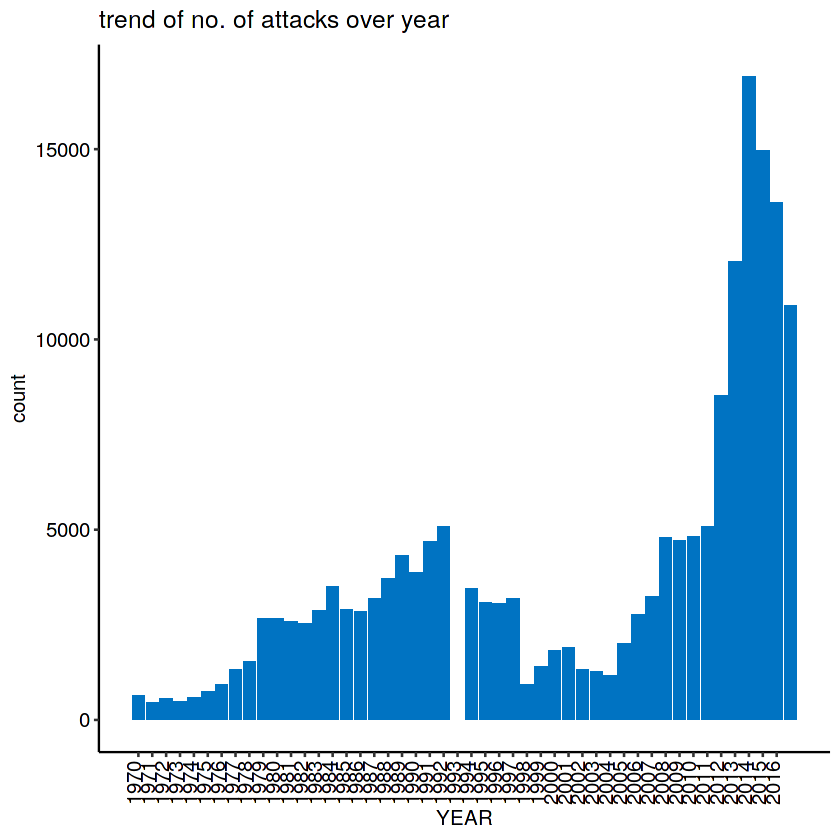

In [6]:
ggplot(df, aes(iyear)) +
  geom_bar(fill = "#0073C2FF")+ggtitle("trend of no. of attacks over year")+theme(axis.text.x = element_text(angle = 90, hjust =1, vjust = 0.2))+scale_x_continuous("YEAR", breaks = seq(1970, 2016, 1))

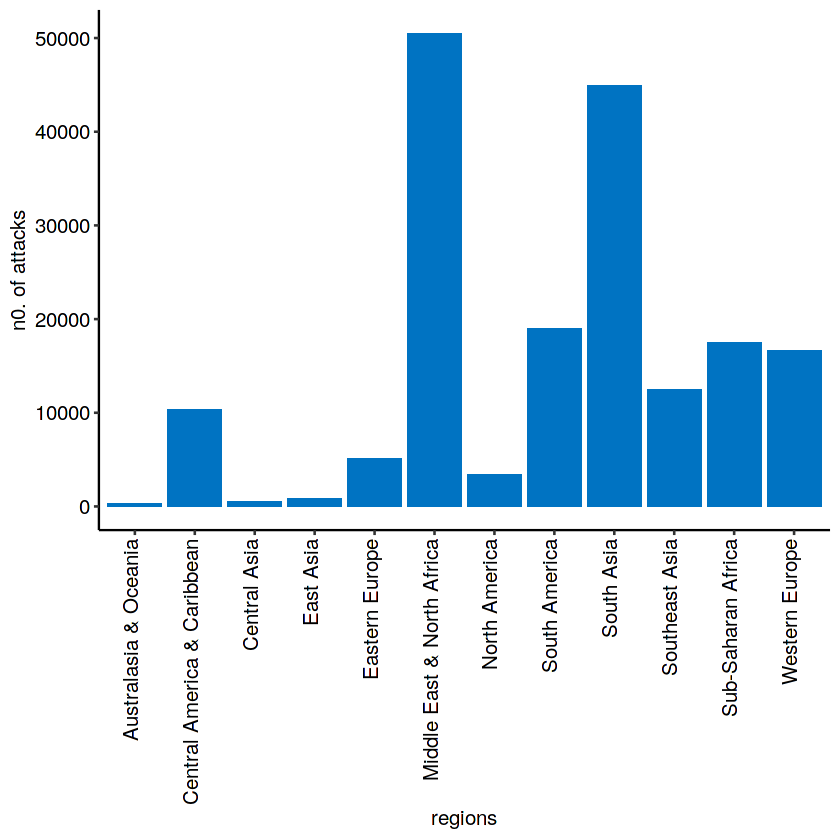

In [8]:
#unique(df$region_txt)
#unique(df$region_txt)
ggplot(df, aes(region_txt)) +
  geom_bar(fill = "#0073C2FF")+labs(x="regions",y="n0. of attacks")+theme(axis.text.x = element_text(angle = 90, hjust =1, vjust = 0.2))

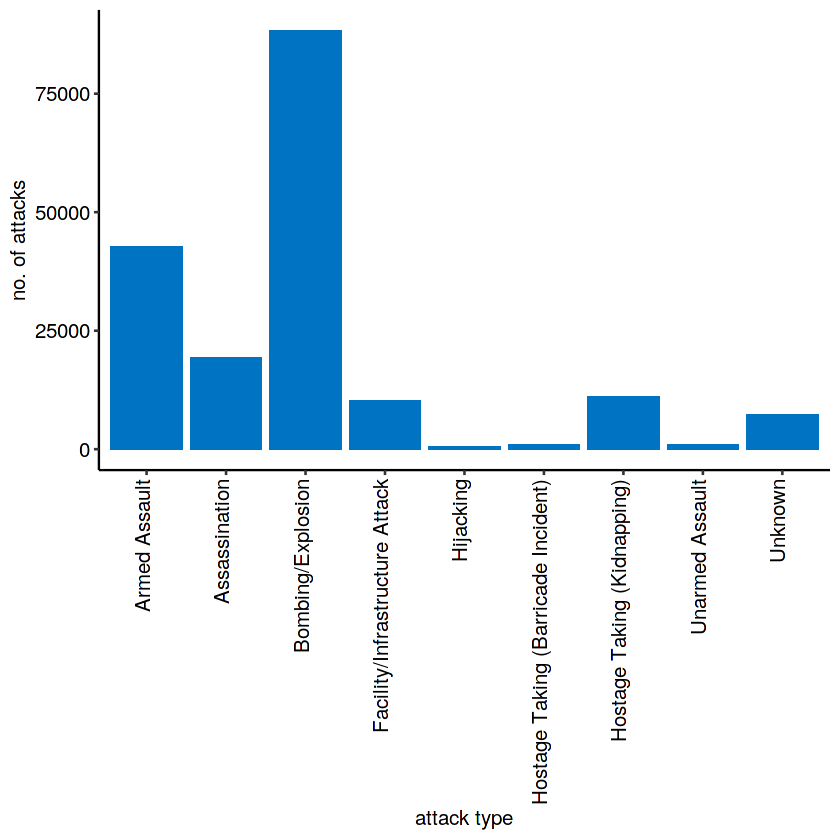

In [11]:
ggplot(df, aes(attacktype1_txt)) +
  geom_bar(fill = "#0073C2FF")+labs(x="attack type",y="no. of attacks")+theme(axis.text.x = element_text(angle = 90, hjust =1, vjust = 0.2))

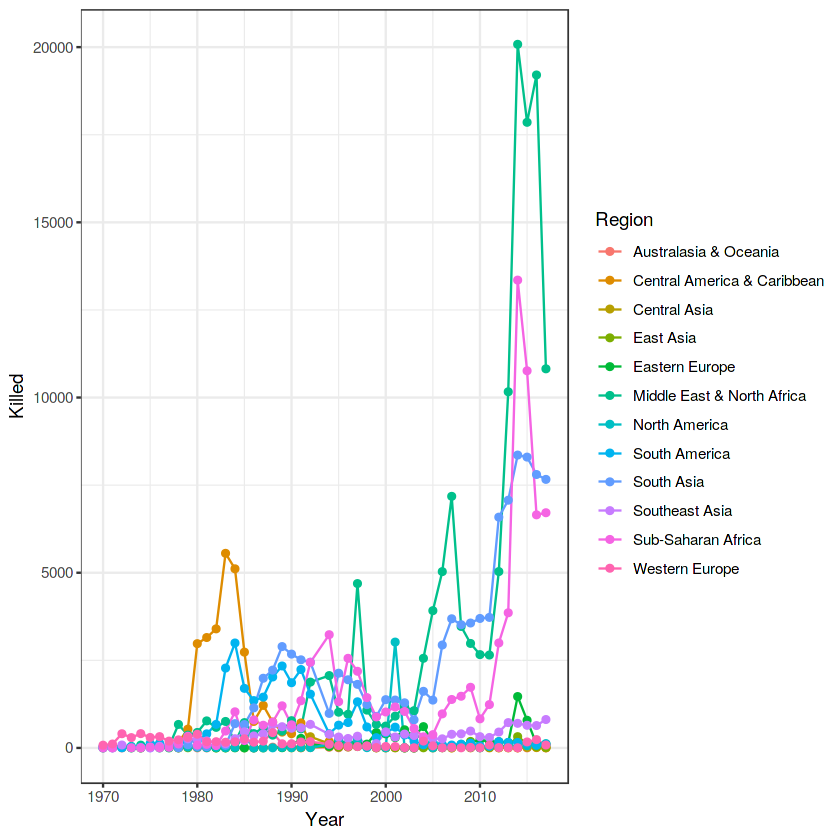

In [12]:
df %>% filter(nkill > 0) -> dfk
dfk %>% group_by(iyear,region_txt) %>% summarise(nkills = sum(nkill)) %>% ungroup() -> dfyr
colnames(dfyr)<-c("Year","Region","Killed")
ggplot(data = dfyr, aes(x = Year, y = Killed, colour = Region)) +       
   geom_line() + geom_point() + theme_bw()

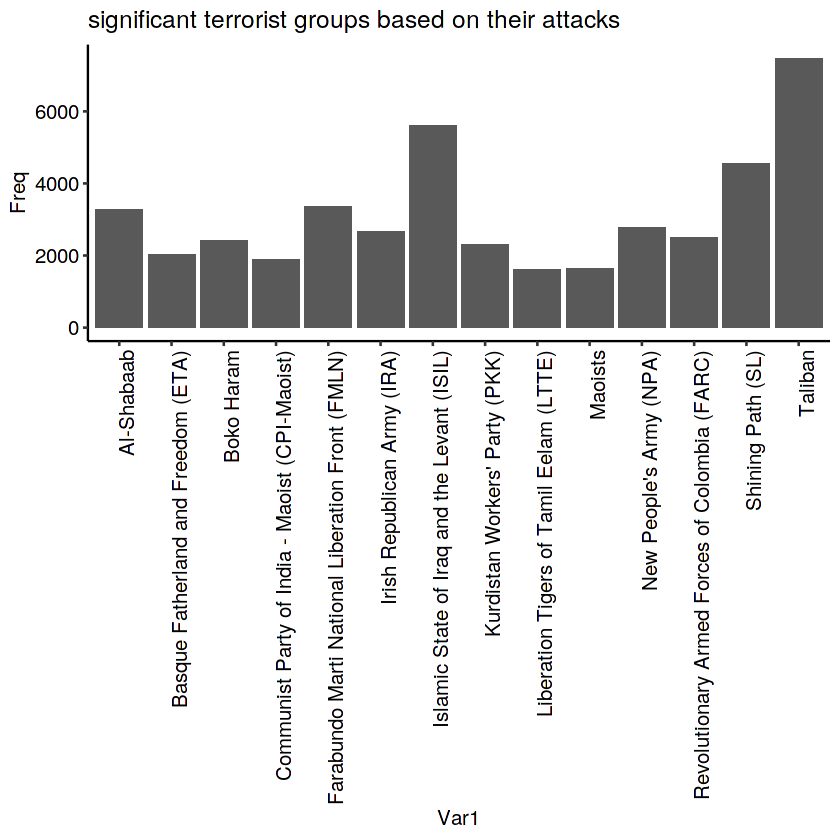

In [13]:
library(dplyr)
counts = table(df$gname)
dict = as.data.frame(counts) %>% arrange(desc(Freq))
#par(mar = c(5,20,5.7,5)) 
#barplot(dict$Freq[2:20], names = dict$Var1[2:20], las = 2, cex.names = 1, horiz = TRUE, xlim = c(0,10000), main = "The Groups causing attacks")
library(ggplot2)
g <- ggplot(dict[2:15,], aes(x=Var1, y=Freq))+geom_bar(stat="identity")+theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("significant terrorist groups based on their attacks")
g

In [15]:
install.packages("rworldmap")
library(rworldmap)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘rworldmap’ is not available (for R version 3.6.0)”


187 codes from your data successfully matched countries in the map
18 codes from your data failed to match with a country code in the map
56 codes from the map weren't represented in your data


You asked for 7 categories, 5 were used due to pretty() classification



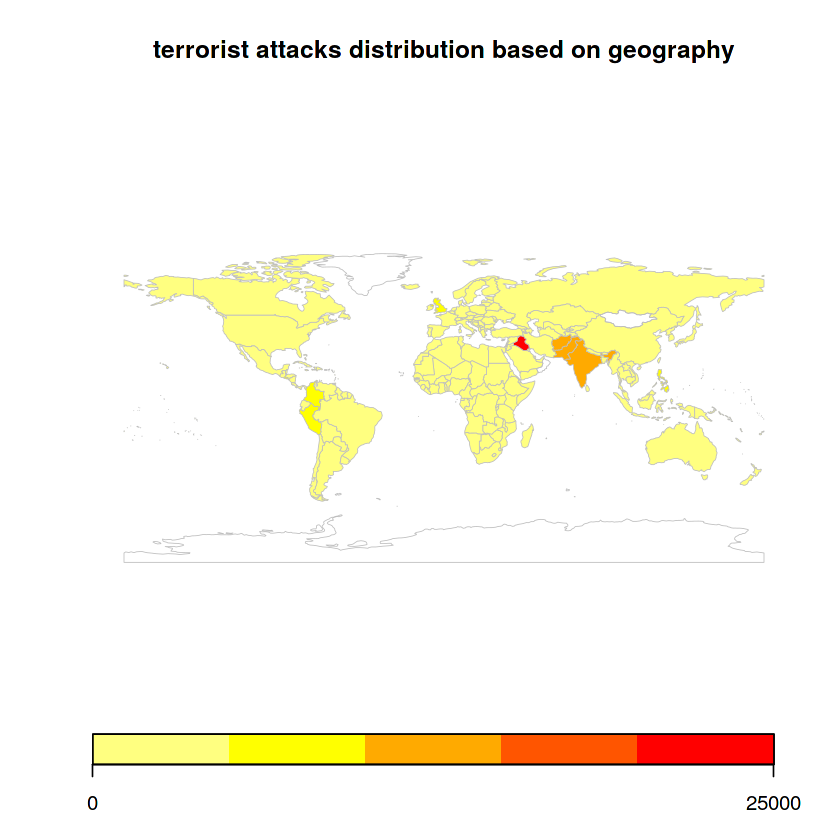

In [17]:
country_freq = as.data.frame(table(df$country_txt))
colnames(country_freq) = c("country","frequency")
matched = joinCountryData2Map(country_freq, joinCode="NAME", nameJoinColumn="country")
mapCountryData(matched,nameColumnToPlot="frequency", mapTitle="terrorist attacks distribution based on geography", catMethod = "pretty", colourPalette = "heat")

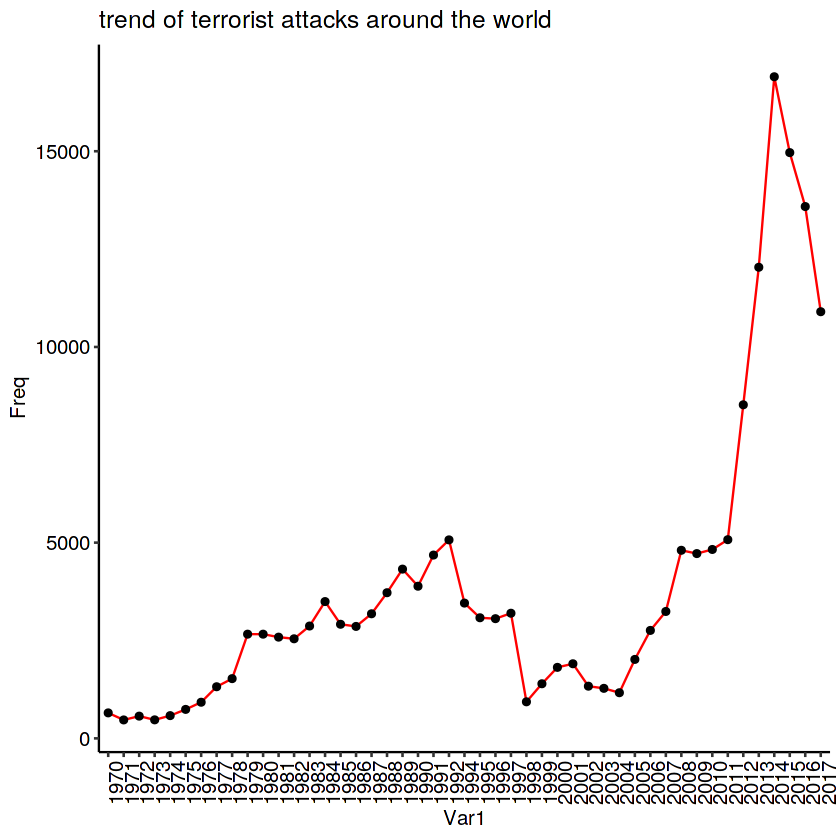

In [18]:
line_plot =  as.data.frame(table(df$iyear))
ggplot(data=line_plot, aes(x=Var1, y=Freq, group=1)) +
  geom_line(color="red")+
  geom_point()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+ggtitle("trend of terrorist attacks around the world")

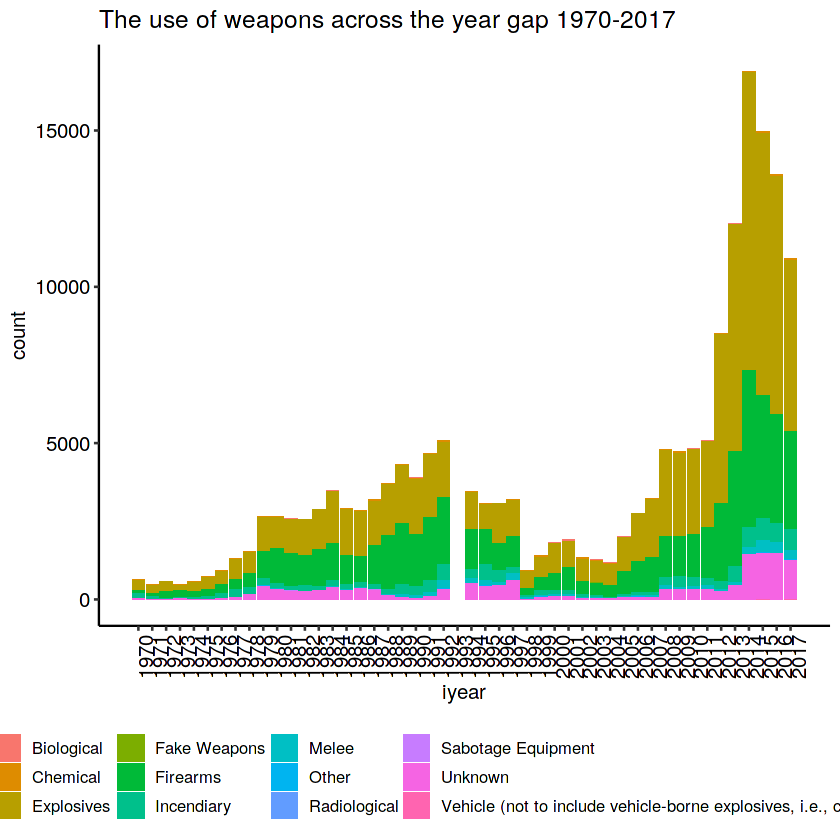

In [19]:
#trend = df %>% group_by(weaptype1_txt) %>% group_by(iyear) %>% summarise(count = n())
trend = df %>% group_by(iyear,weaptype1_txt) %>% summarise(count = n())
#ggplot(data=trend, aes(x=iyear, y=count, group=weaptype1_txt)) +
 # geom_bar(aes(linetype=weaptype1_txt))+theme(plot.margin = unit(c(1,0,1,1), "cm"))+
  #geom_point()
stacked = ggplot() + geom_bar(aes(y = count, x = iyear, fill = weaptype1_txt), data = trend,
                           stat="identity")+theme(legend.position="bottom", legend.direction="horizontal", legend.title = element_blank())+
            ggtitle("The use of weapons across the year gap 1970-2017")+scale_x_continuous(breaks=seq(1970,2017,1))+theme(axis.text.x = element_text(angle = 90, hjust = 1))
stacked